In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
df=pd.read_csv('Tetuan City power consumption.csv')

In [3]:
df.head()

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption,Sum
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386,70425.53544
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434,69320.84387
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373,67803.22193
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711,65489.23209
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964,63650.44627


In [4]:
df.describe()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption,Sum
count,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000
mean,18.810024,68.259518,1.959489,182.696614,75.028022,32344.970564,21042.509082,17835.406218,71222.885865
std,5.815476,15.551177,2.348862,264.400960,124.210949,7130.562564,5201.465892,6622.165099,17143.138964
min,3.247000,11.340000,0.050000,0.004000,0.011000,13895.696200,8560.081466,5935.174070,36785.039740
25%,14.410000,58.310000,0.078000,0.062000,0.122000,26310.668692,16980.766032,13129.326630,56499.074640
50%,18.780000,69.860000,0.086000,5.035500,4.456000,32265.920340,20823.168405,16415.117470,69788.790940
75%,22.890000,81.400000,4.915000,319.600000,101.000000,37309.018185,24713.717520,21624.100420,83749.172310
max,40.010000,94.800000,6.483000,1163.000000,936.000000,52204.395120,37408.860760,47598.326360,134208.146000


In [5]:
df.columns

Index(['DateTime', 'Temperature', 'Humidity', 'Wind Speed',
       'general diffuse flows', 'diffuse flows', 'Zone 1 Power Consumption',
       'Zone 2  Power Consumption', 'Zone 3  Power Consumption', 'Sum'],
      dtype='object')

In [6]:
df.isna().sum()

DateTime                     0
Temperature                  0
Humidity                     0
Wind Speed                   0
general diffuse flows        0
diffuse flows                0
Zone 1 Power Consumption     0
Zone 2  Power Consumption    0
Zone 3  Power Consumption    0
Sum                          0
dtype: int64

In [7]:
df.drop(['Zone 1 Power Consumption','Zone 2  Power Consumption','Zone 3  Power Consumption'],axis=1,inplace=True)

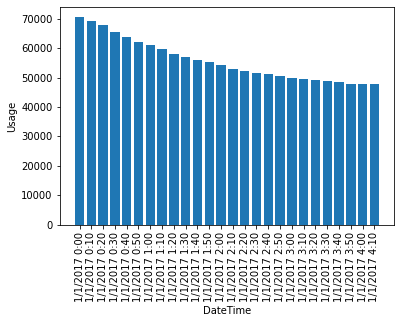

In [8]:
import matplotlib.pyplot as plt
plt.bar(df.head(26)['DateTime'],df.head(26)['Sum'])
plt.xlabel("DateTime")
plt.xticks(rotation=90)
plt.ylabel("Usage")
plt.show()

In [9]:
df['Month']=pd.to_datetime(df['DateTime'],format="%m/%d/%Y %H:%M").dt.month
df['Hour']=pd.to_datetime(df['DateTime'],format="%m/%d/%Y %H:%M").dt.hour

In [10]:
df['DateTime'] = pd.to_datetime(df['DateTime'])
df.index=df['DateTime']

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Month', ylabel='Sum'>

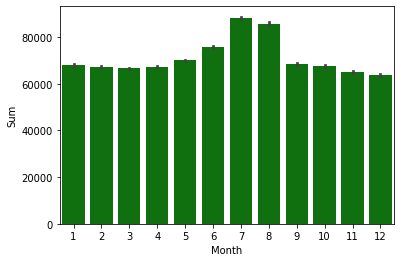

In [11]:
import seaborn as sns
sns.barplot(df['Month'],df['Sum'],color='g')

In [12]:
df.drop('DateTime',axis=1,inplace=True)

In [13]:
df.head()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Sum,Month,Hour
DateTime,,,,,,,,
2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,70425.53544,1,0
2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,69320.84387,1,0
2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,67803.22193,1,0
2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,65489.23209,1,0
2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,63650.44627,1,0


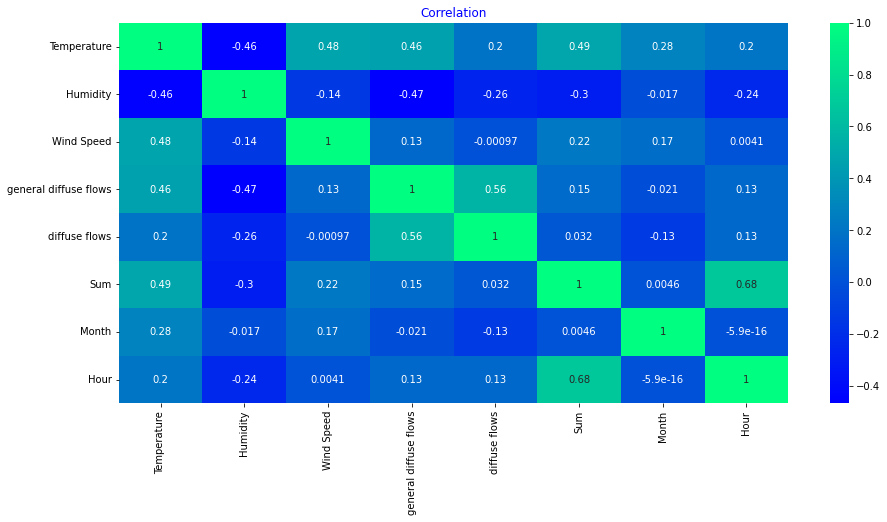

In [14]:
corr=df.corr()
plt.figure(figsize = (15,7))
sns.heatmap(df.corr(), annot = True, cmap = 'winter')
plt.title("Correlation", color = 'b')
plt.show()

In [15]:
for col in df:
    maxV=abs(corr[col]).nlargest(n=3)
    print(maxV)
    for index,value in maxV.items():
        if 1>value>=0.75:
            print(index,' ile ',col,'değişkenleri yüksek korelasyona sahip',value)

Temperature    1.000000
Sum            0.488238
Wind Speed     0.477109
Name: Temperature, dtype: float64
Humidity                 1.000000
general diffuse flows    0.468138
Temperature              0.460243
Name: Humidity, dtype: float64
Wind Speed     1.000000
Temperature    0.477109
Sum            0.221706
Name: Wind Speed, dtype: float64
general diffuse flows    1.000000
diffuse flows            0.564718
Humidity                 0.468138
Name: general diffuse flows, dtype: float64
diffuse flows            1.000000
general diffuse flows    0.564718
Humidity                 0.256886
Name: diffuse flows, dtype: float64
Sum            1.000000
Hour           0.679532
Temperature    0.488238
Name: Sum, dtype: float64
Month          1.000000
Temperature    0.284335
Wind Speed     0.168355
Name: Month, dtype: float64
Hour        1.000000
Sum         0.679532
Humidity    0.242692
Name: Hour, dtype: float64


In [16]:
df.columns

Index(['Temperature', 'Humidity', 'Wind Speed', 'general diffuse flows',
       'diffuse flows', 'Sum', 'Month', 'Hour'],
      dtype='object')

In [55]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,mean_absolute_percentage_error
from sklearn.tree import DecisionTreeRegressor

In [56]:
X = df.drop(['Sum'],axis=1)
y = df['Sum']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
tree_model = DecisionTreeRegressor(max_depth=15, random_state=42)
tree_model.fit(X_train, y_train)
y_pred = tree_model.predict(X_test)

#pd.DataFrame({"Actual values": y_test, "Predicted values": y_pred})

(39312, 7)
(13104, 7)
(39312,)
(13104,)


In [57]:
import math
print('R^2 Score : ',r2_score(y_test,y_pred))
print('Mean Absolute Error : ', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error : ', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error : ', math.sqrt(mean_squared_error(y_test, y_pred)))
print('Mean Absolute Percentage Error : ', mean_absolute_percentage_error(y_test, y_pred))

R^2 Score :  0.9563958856994268
Mean Absolute Error :  2397.6553256532175
Mean Squared Error :  12870048.9164912
Root Mean Squared Error :  3587.485040594762
Mean Absolute Percentage Error :  0.034764687199177614


In [ ]:
from sklearn.neural_network import MLPRegressor
nn = MLPRegressor(hidden_layer_sizes=(30,10,10,30), max_iter=800, activation='relu',verbose=1)
nn.fit(X_train, y_train)
y_pred = nn.predict(X_test)
print('R^2 Score : ',r2_score(y_test,y_pred))
print('Mean Absolute Error : ', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error : ', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error : ', math.sqrt(mean_squared_error(y_test, y_pred)))
print('Mean Absolute Percentage Error : ', mean_absolute_percentage_error(y_test, y_pred))

In [ ]:
predict_df=pd.DataFrame({"y_test":y_test,"y_pred":y_pred,"sub":abs(y_test-y_pred)})
predict_df

In [ ]:
plt.scatter(y_test,y_pred)
plt.title("MLPRegressor")
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import math

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

regressor=RandomForestRegressor(n_estimators=1000)
regressor.fit(X_train,y_train)
y_pred=regressor.predict(X_test)

print('R^2 Score : ',r2_score(y_test,y_pred))
print('Mean Absolute Error : ', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error : ', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error : ', math.sqrt(mean_squared_error(y_test, y_pred)))
print('Mean Absolute Percentage Error : ', mean_absolute_percentage_error(y_test, y_pred))

In [ ]:
plt.scatter(y_test,y_pred)
plt.title("RFRegressor")
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
r3=KNeighborsRegressor()
r3.fit(X_train,y_train)
y_pred=r3.predict(X_test)
print('R^2 Score : ',r2_score(y_test,y_pred))
print('Mean Absolute Error : ', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error : ', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error : ', math.sqrt(mean_squared_error(y_test, y_pred)))
print('Mean Absolute Percentage Error : ',mean_absolute_percentage_error(y_test,y_pred))

In [ ]:
plt.scatter(y_test,y_pred)
plt.title("KNNRegressor")
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [ ]:
import xgboost as xgb
reg = xgb.XGBRegressor(booster='gbtree',n_estimators=1500,max_depth=5,learning_rate=0.1)
reg.fit(X_train, y_train)
y_pred=reg.predict(X_test)

In [ ]:
print('r2: ', round(r2_score(y_test,y_pred),3))
print('MAE: ', round(mean_absolute_error(y_test,y_pred),3))
print('MSE: ', round(mean_squared_error(y_test,y_pred),3))
print('MAPE: ', round(mean_absolute_percentage_error(y_test,y_pred),3))

In [ ]:
plt.scatter(y_test,y_pred)
plt.title("XGBoost Regressor")
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()